In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
train = pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments/Titanic_train.csv',index_col=0)
test = pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments/Titanic_test.csv',index_col=0)

In [71]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [75]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [76]:
test.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327
Embarked,0


In [77]:
train.shape

(891, 11)

In [78]:
train.drop(columns='Cabin',inplace=True)

In [79]:
test.drop(columns='Cabin',inplace=True)

In [80]:
train['Age'].median()

28.0

In [81]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

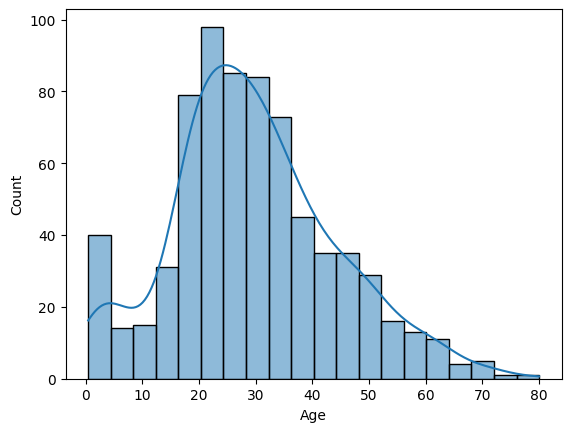

In [82]:
sns.histplot(train['Age'],kde=True)

In [83]:
train['Age']=train['Age'].fillna(28)
test['Age']=test['Age'].fillna(28)

In [84]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [85]:
test.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [86]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [87]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [88]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


In [89]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [91]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [92]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
train[['Sex','Embarked']] = pd.DataFrame(encoder.fit_transform(train[['Sex','Embarked']]))
test[['Sex','Embarked']] = encoder.transform(test[['Sex','Embarked']])

In [93]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0.0,22.0,1,0,7.2500,0.0
2,1,1,0.0,38.0,1,0,71.2833,2.0


<Axes: >

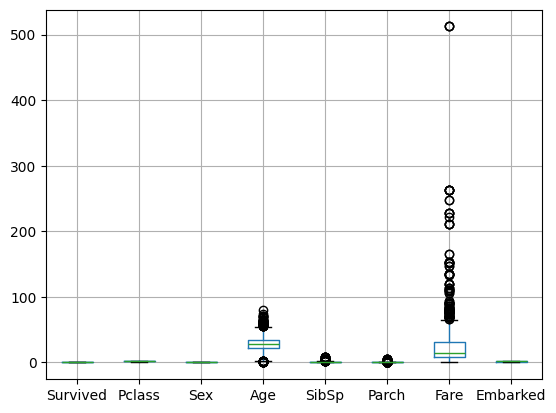

In [94]:
train.boxplot()

In [95]:
def outliers(data):
  data_num = data.select_dtypes(include = 'number')

  for col in data_num:
      q1 = data[col].quantile(0.25)
      q3 = data[col].quantile(0.75)

      IQR = q3-q1
      lower_bound = q1 - 1.5*IQR
      upper_bound = q3 + 1.5*IQR

      data[col] = np.where(data[col] < lower_bound, lower_bound,
                      np.where(data[col] > upper_bound, upper_bound, data[col]))

  return data

In [96]:
train = outliers(train)

<Axes: >

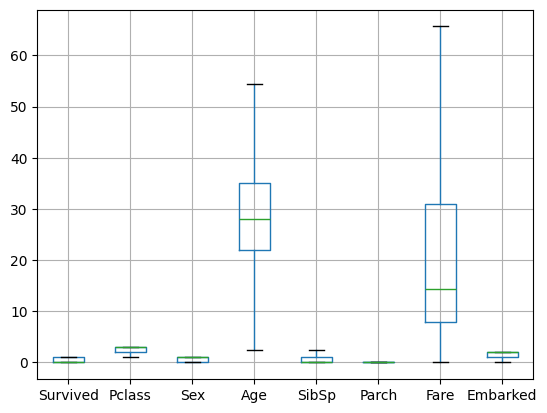

In [97]:
train.boxplot()

In [98]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [99]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [100]:
train.dropna(inplace=True)


In [101]:
y = train[['Survived']]
X = train.drop(columns=y)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=42)


In [103]:
lr = LogisticRegression(C=1)
lr.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1)

In [104]:
y_pred = lr.predict(X_test)

In [105]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [107]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.6966
Precision: 0.6444
Recall: 0.4328
F1-score: 0.5179
ROC-AUC: 0.6675


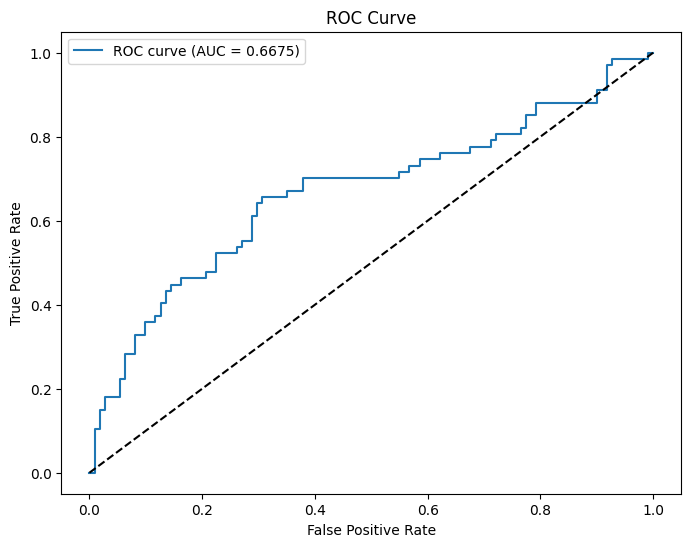

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [109]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [110]:
coefs = lr.coef_
coefs

array([[-0.76089598,  0.21721954, -0.04328802, -0.34890022,  0.        ,
         0.02052386, -0.05652043]])

# **Interpreting coefficients of The model**
* **Pclass = -0.76089598 :-** It decreaces the probability of survival odds
* **Sex = +2172 :-** Being female increased survival odds
* **Age = -0.04 :-** Older age slightly decreases chance of survival
* **SibSp = -0.35 :-** Having many siblings/spouses aboard reduced survival probability
* **Parch 0.00 :-** Basically no effect in your model
* **Fare +0.02 :-** Higher fare better survival odds
* **Embarked -0.05 :-** Small negative effect

In [111]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
coefs = [-0.76089598,  0.21721954, -0.04328802, -0.34890022,  0.        ,
         0.02052386, -0.05652043]

odds_ratios = np.exp(coefs)

for f, c, o in zip(features, coefs, odds_ratios):
    print(f"{f}: Coef = {c:.4f}, Odds Ratio = {o:.4f}")

Pclass: Coef = -0.7609, Odds Ratio = 0.4672
Sex: Coef = 0.2172, Odds Ratio = 1.2426
Age: Coef = -0.0433, Odds Ratio = 0.9576
SibSp: Coef = -0.3489, Odds Ratio = 0.7055
Parch: Coef = 0.0000, Odds Ratio = 1.0000
Fare: Coef = 0.0205, Odds Ratio = 1.0207
Embarked: Coef = -0.0565, Odds Ratio = 0.9450


## ***Interview Questions***

### **What is the difference between precision and recall**

* **Precision**= TP/TP+FP​

Out of all the positives your model predicted, how many were actually correct?

It’s about being right when you say YES.

* **Recall**=TP/ TP+FN

Out of all the actual positives, how many did your model catch?

It’s about not missing positives.

* High Precision, Low Recall
* High Recall, Low Precision

### **What is cross-validation, and why is it important in binary classification?**

Cross-validation is a statistical method used to estimate how accurately a predictive model will perform in practice on new, unseen data. It is a way to test the model's performance without having to hold back a large, single test set that might not be representative of the entire population.

In [112]:
import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)